In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import t

from typing import Tuple

## Exec time vs N_SAMPLES

In [2]:
def get_thr_ci(
        data: pd.DataFrame,
        column: str,
        ci_interval: float = 0.95
) -> Tuple[pd.Series, pd.Series, pd.Series]:

    data = data.groupby([column])['Time']

    measurements = data.count()
    mean = data.mean()
    std = data.std()

    alpha = 1 - ci_interval
    z = t.ppf(1 - alpha / 2, measurements - 1)

    ci_low = mean - z * std / np.sqrt(measurements)
    ci_high = mean + z * std / np.sqrt(measurements)

    return mean, np.clip(ci_low, 0, np.inf), ci_high

In [11]:
def time_vs_dataset_size(hidden_nodes: int, scale: str = "log"):

    df = pd.read_csv("all_results.csv")
    df = df[df["Hidden_Nodes"] == hidden_nodes]
    frameworks = df["Framework"].unique()

    fig, ax = plt.subplots(figsize=(10, 5))
    for framework in frameworks:
        mean, ci_low, ci_high = get_thr_ci(df[df.Framework == framework], "N_Samples")

        ax.plot(mean.index, mean, marker='o', markersize=2, label=f"{framework}")
        ax.fill_between(mean.index, ci_low, ci_high, alpha=0.3, linewidth=0.0)

    plt.xscale(scale)
    plt.xlabel('Dataset Size')
    plt.ylabel('Execution Time (s)')
    plt.title(f'ESN performance with reservoir of size {hidden_nodes}')
    plt.legend()
    plt.grid(which='both')
    plt.savefig(f"exec-time_vs_dataset-size_{hidden_nodes}-hidden-nodes.pdf", bbox_inches='tight')


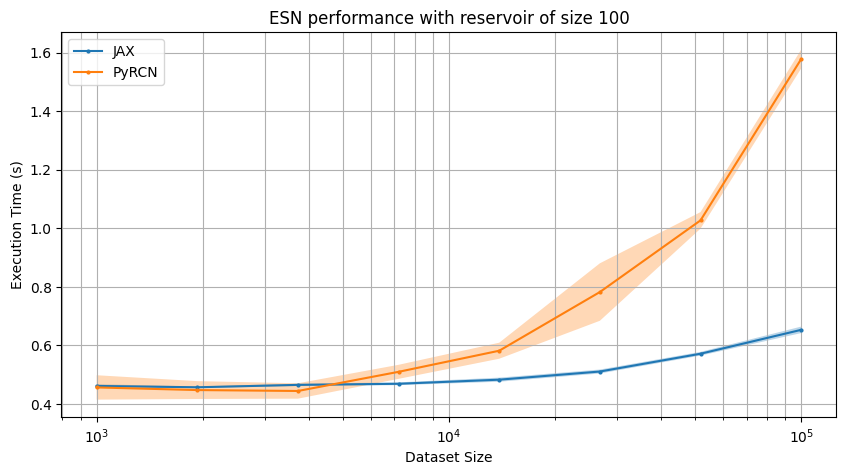

In [12]:
time_vs_dataset_size(100, "log")

In [15]:
def time_vs_hidden_nodes(dataset_size: int, scale: str = "log"):

    df = pd.read_csv("all_results.csv")
    df = df[df["N_Samples"] == dataset_size]
    frameworks = df["Framework"].unique()

    fig, ax = plt.subplots(figsize=(10, 5))
    for framework in frameworks:
        mean, ci_low, ci_high = get_thr_ci(df[df.Framework == framework], "Hidden_Nodes")

        ax.plot(mean.index, mean, marker='o', markersize=2, label=f"{framework}")
        ax.fill_between(mean.index, ci_low, ci_high, alpha=0.3, linewidth=0.0)

    plt.xscale(scale)
    plt.xlabel('No. Hidden Nodes')
    plt.ylabel('Execution Time (s)')
    plt.title(f'ESN performance on a dataset of {dataset_size} samples')
    plt.legend()
    plt.grid(which="both")
    plt.savefig(f"exec-time_vs_hidden-nodes_{dataset_size}-data-points.pdf", bbox_inches='tight')


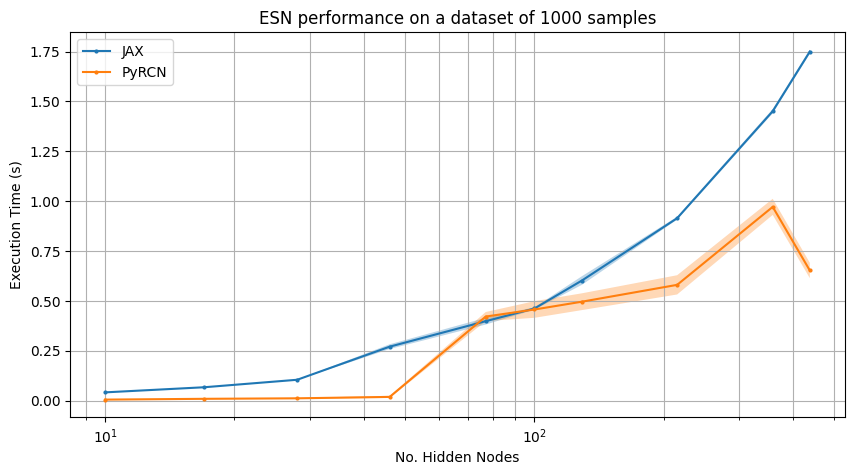

In [16]:
time_vs_hidden_nodes(1000, "log")